In [1]:
# import required libraries / dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

In [2]:
# define the paths to the dataset.
training_path = '../input/cat-and-dog/training_set/training_set/'
test_path = '../input/cat-and-dog/test_set/test_set/'

In [3]:
# Create dataset
image_size = (200, 200)
batch_size = 32

training_set = keras.preprocessing.image.image_dataset_from_directory(
    directory=training_path,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size
)
test_set = keras.preprocessing.image.image_dataset_from_directory(
    directory=test_path,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size,
    
)

Found 8005 files belonging to 2 classes.


2022-12-30 19:52:04.143911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 19:52:04.144878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 19:52:04.293278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 19:52:04.294175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 19:52:04.294935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Found 2023 files belonging to 2 classes.


2022-12-30 19:52:08.236379: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


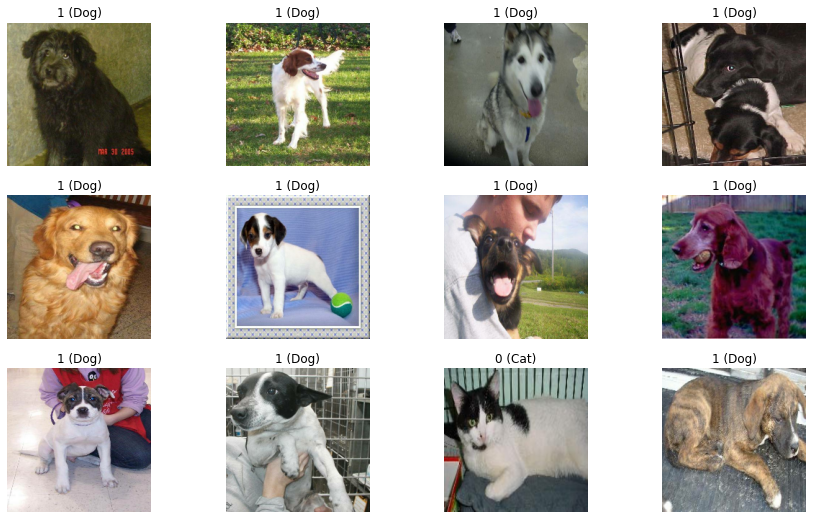

In [4]:
# visualize the training set
plt.figure(figsize=(15, 9))
def cat_or_dog(a):
    if a==0:
        return 'Cat'
    return 'Dog'
    
for images, labels in training_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])} ({cat_or_dog(int(labels[i]))})')
        plt.axis('off')

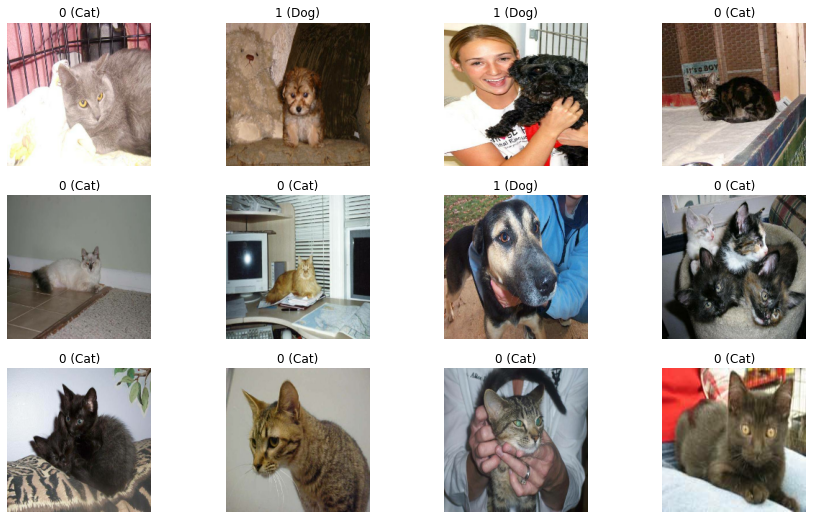

In [5]:
# visualize the test set
plt.figure(figsize=(15, 9))
def cat_or_dog(a):
    if a==0:
        return 'Cat'
    return 'Dog'
    
for images, labels in test_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])} ({cat_or_dog(int(labels[i]))})')
        plt.axis('off')

In [6]:
# define some layers of data augmentation
augmented_data = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1)
])

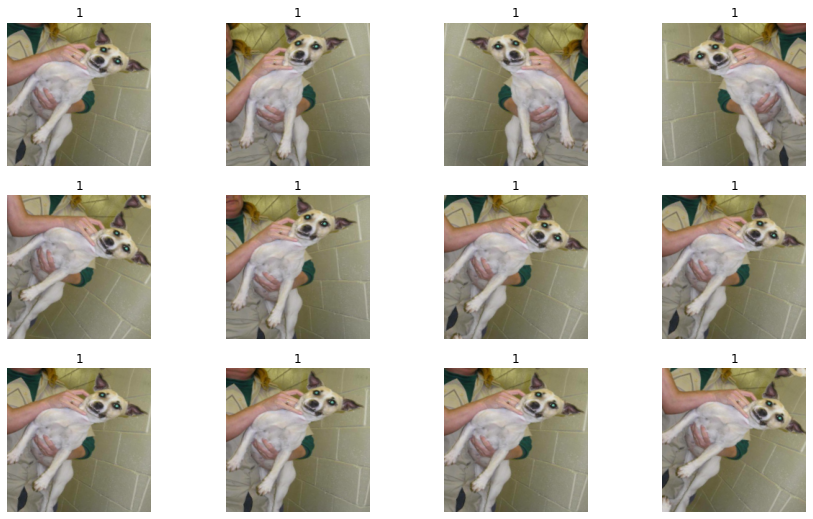

In [7]:
# visualize it
plt.figure(figsize=(15, 9))
    
for images, labels in test_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        augmented_image = augmented_data(images[0])
        plt.imshow(augmented_image.numpy().astype('uint8'))
        plt.title(int(labels[0]))
        plt.axis('off')


In [8]:
# build the model
model = Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)),
    
    # preprocessing
    layers.CenterCrop(180, 180),
    layers.Rescaling(scale=1./255),
    
    
    # applying image data augmentation
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Flatten(),
    
    # output layer
    layers.Dense(1, activation='sigmoid')
])

In [9]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 128)     3584      
_________________________________________________________________
center_crop (CenterCrop)     (None, 180, 180, 128)     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 128)     0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 180, 180, 128)     0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 256)      

In [10]:
epochs = 50
# callbacks (save the model at each epoch)
callbacks = [
    keras.callbacks.ModelCheckpoint("checkpoints/model_at_{epoch}.h5"),
]

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fit the model
model.fit(training_set, validation_data=test_set, epochs=epochs, callbacks=callbacks, verbose=2)

Epoch 1/50


2022-12-30 19:52:16.605216: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-12-30 19:52:24.723987: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x564090680a80


251/251 - 76s - loss: 0.6934 - accuracy: 0.5067 - val_loss: 0.6893 - val_accuracy: 0.5428
Epoch 2/50
251/251 - 59s - loss: 0.6822 - accuracy: 0.5676 - val_loss: 0.6592 - val_accuracy: 0.6223
Epoch 3/50
251/251 - 61s - loss: 0.6517 - accuracy: 0.6221 - val_loss: 0.6560 - val_accuracy: 0.6312
Epoch 4/50
251/251 - 60s - loss: 0.6296 - accuracy: 0.6520 - val_loss: 0.6781 - val_accuracy: 0.6401
Epoch 5/50
251/251 - 60s - loss: 0.5962 - accuracy: 0.6806 - val_loss: 0.5845 - val_accuracy: 0.7034
Epoch 6/50
251/251 - 60s - loss: 0.5811 - accuracy: 0.6941 - val_loss: 0.5692 - val_accuracy: 0.7039
Epoch 7/50
251/251 - 60s - loss: 0.5638 - accuracy: 0.7062 - val_loss: 0.5553 - val_accuracy: 0.7301
Epoch 8/50
251/251 - 60s - loss: 0.5308 - accuracy: 0.7384 - val_loss: 0.5724 - val_accuracy: 0.7261
Epoch 9/50
251/251 - 60s - loss: 0.5108 - accuracy: 0.7462 - val_loss: 0.5010 - val_accuracy: 0.7632
Epoch 10/50
251/251 - 60s - loss: 0.5015 - accuracy: 0.7518 - val_loss: 0.4810 - val_accuracy: 0.7771


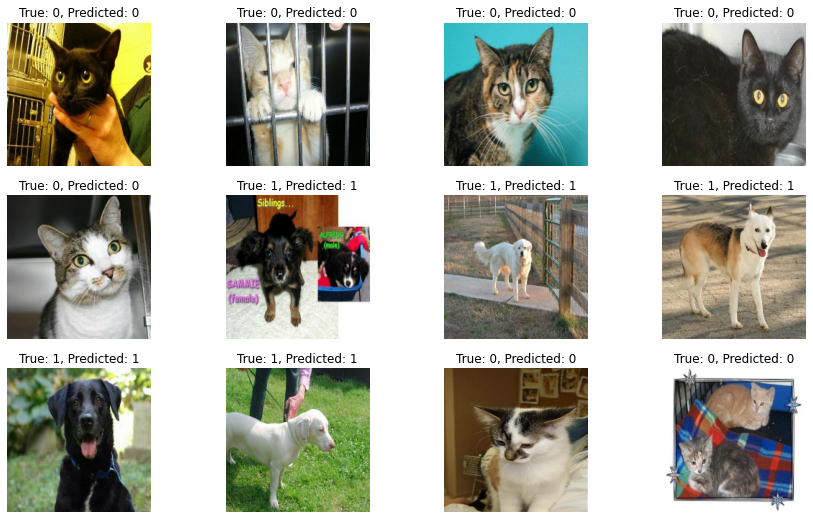

In [11]:
# visualize the predicted data
loaded_model = keras.models.load_model('checkpoints/model_at_50.h5')

plt.figure(figsize=(15, 9))

def predict(imgs):
    pred = []
    for i in loaded_model.predict(images.numpy().astype('uint8')):
        if i[0] > .5:
            pred.append(1)
        else:
            pred.append(0)
    return pred
    
for images, labels in test_set.take(1):
    pred = predict(images)
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'True: {int(labels[i])}, Predicted: {pred[i]}')
        plt.axis('off')